<a href="https://colab.research.google.com/github/RocketRikky/Deep_Learning_Projects/blob/master/Handwriting_Recognition_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelled training!")
      self.model.stop_training = True
      
callbacks=myCallback()

(x_train, x_test) = x_train/255.0, x_test / 255.0 
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])
# YOUR CODE SHOULD END HERE

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2001 - acc: 0.9411
Epoch 2/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.0810 - acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0533 - acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0365 - acc: 0.9883
Epoch 5/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9913
Reached 99% accuracy so cancelled training!
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0274 - acc: 0.9912


In [2]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0734 - acc: 0.9792


[0.07336147252861992, 0.9792]

In [3]:
predictions = model.predict(x_test)

print(predictions[0])

[9.9076680e-10 1.7543412e-12 7.3569595e-09 3.7763075e-06 2.1901822e-16
 3.0668486e-09 9.3017787e-15 9.9999619e-01 5.7770553e-09 3.2285868e-08]


7


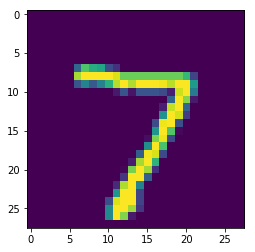

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print(y_test[0])